# Expected values

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import pickle

In [55]:
def r(n, r):  
    enc = b'\x80\x03}q\x00(K\x01G@\x0c\x00\x00\x00\x00\x00\x00K\x02G@\x11UL\x98_\x06\xf7K\x03G@\x05Uf\xcfA\xf2\x13K\x04G@\x0c\x00\x00\x00\x00\x00\x00K\x05K\x01K\x07K\x03K\x08K\x02K\tK\x01K\nX\x08\x00\x00\x00nu/da/daq\x01K\x0bG@\x0c\x00\x00\x00\x00\x00\x00K\x0cG@.U\x81\x06$\xdd/K\rG@\x07V\x04\x18\x93t\xbcK\x0eK\x01K\x0fK\x03K\x10K\x01K\x11K\x04u.'
    d = pickle.loads(enc)
    if d.get(n) is not None and d[n] == r: return True
    return False

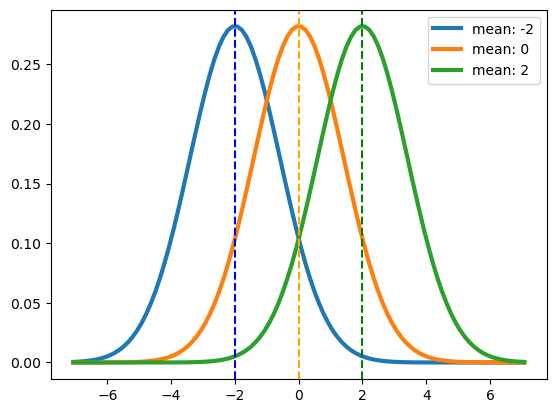

In [56]:
%matplotlib inline
import math

mu = 0
variance = 2
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y1 = stats.norm.pdf(x, mu-2, sigma)
y2 = stats.norm.pdf(x, mu, sigma)
y3 = stats.norm.pdf(x, mu+2, sigma)
plt.plot(x, y1, x, y2, x, y3, lw=3)
plt.axvline(x=mu-2, c='b', linestyle='--')
plt.axvline(x=mu, c='orange', linestyle='--')
plt.axvline(x=mu+2, c='g', linestyle='--')
plt.legend(['mean: -2', 'mean: 0', 'mean: 2'])
x1 = np.linspace(mu - 5*sigma, 0, 50)
plt.show()

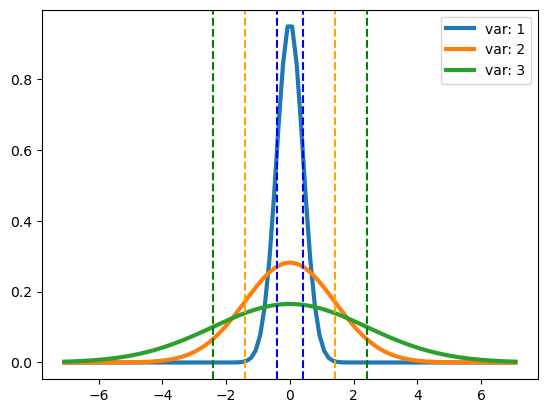

In [57]:
%matplotlib inline
import math

mu = 0
variance = 2
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y1 = stats.norm.pdf(x, mu, sigma-1)
y2 = stats.norm.pdf(x, mu, sigma)
y3 = stats.norm.pdf(x, mu, sigma+1)
plt.plot(x, y1, x, y2, x, y3, lw=3)
[plt.axvline(x=x_, c='blue', linestyle='--') for x_ in [mu-(sigma-1), mu+(sigma-1)]]
[plt.axvline(x=x_, c='orange', linestyle='--') for x_ in [mu-sigma, mu+sigma]]
[plt.axvline(x=x_, c='green', linestyle='--') for x_ in [mu-(sigma+1), mu+(sigma+1)]]
plt.legend(['var: 1', 'var: 2', 'var: 3'])
x1 = np.linspace(mu - 5*sigma, 0, 50)
plt.show()

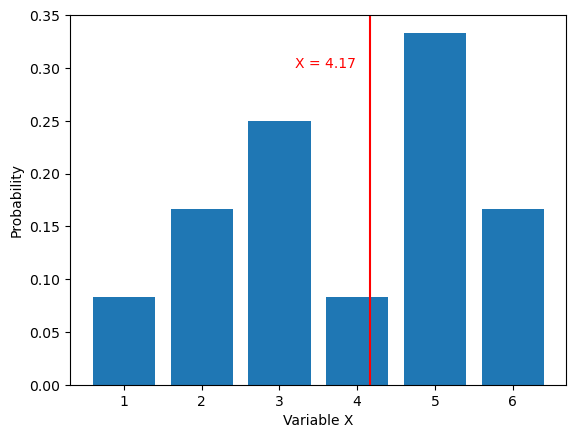

In [58]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([0.5/6, 1/6, 1.5/6, 0.5/6, 2/6, 1/6])
plt.bar(x, y)
plt.axvline(np.dot(x, y), c='r')
plt.annotate('X = %.2f' % np.dot(x, y), xy=(3.2, 0.3), color='r')
plt.xlabel('Variable X')
plt.ylabel('Probability')
plt.show()

In [59]:
sum(y)

1.0833333333333335

In [60]:
# work with pandas dataframes - basics
# https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
df = pd.read_csv('galton.csv')
df.head()
#df['parent'].head().values
#df['parent'].head().index

,Unnamed: 0,parent,child
0,1,70.5,61.7
1,2,68.5,61.7
2,3,65.5,61.7
3,4,64.5,61.7
4,5,64.0,61.7


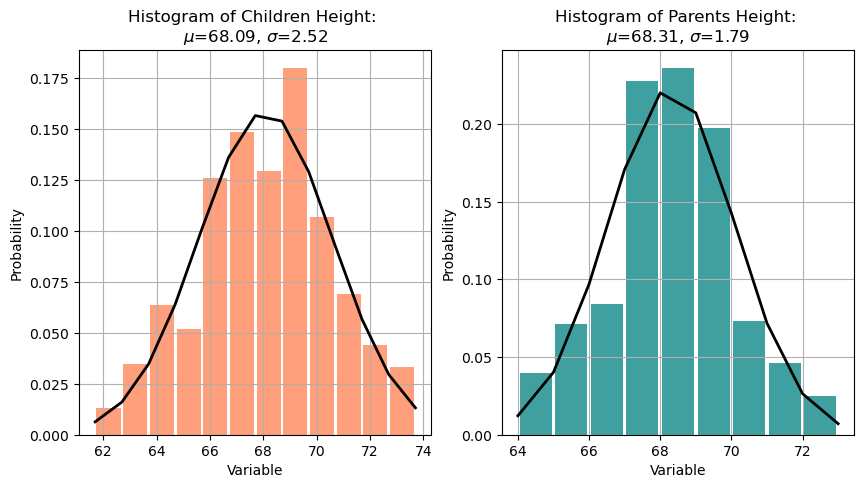

In [61]:
%matplotlib inline
# https://www.rapidtables.com/web/color/RGB_Color.html#color-table
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats

xc = df['child'].values
mu, sigma = stats.norm.fit(xc)

xp = df['parent'].values
mu_p, sigma_p = stats.norm.fit(xp)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# the histogram of the data
n, bins, patches = ax1.hist(xc, 12, rwidth=0.9, density=True, facecolor='coral', alpha=0.75)
n_p, bins_p, patches_p = ax2.hist(xp, 9, rwidth=0.9, density=True, facecolor='teal', alpha=0.75)

# add a 'best fit' line
y = stats.norm.pdf(bins, mu, sigma)
l = ax1.plot(bins, y, 'k-', linewidth=2)
y_p = stats.norm.pdf(bins_p, mu_p, sigma_p)
l_p = ax2.plot(bins_p, y_p, 'k-', linewidth=2)

ax1.set_xlabel('Variable')
ax1.set_ylabel('Probability')
ax1.set_title('Histogram of Children Height: \n$\mu$=' + '%.2f' % mu + ', $\sigma$=' + '%.2f' % sigma)
ax1.grid(True)

ax2.set_xlabel('Variable')
ax2.set_ylabel('Probability')
ax2.set_title('Histogram of Parents Height: \n$\mu$=' + '%.2f' % mu_p + ', $\sigma$=' + '%.2f' % sigma_p)
ax2.grid(True)

In [62]:
# pip install ipywidgets (in prealabil)
# jupyter nbextension enable --py --sys-prefix widgetsnbextension (cu sudo)
#
# reopen page and run this frame first

%matplotlib notebook

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from ipywidgets import *

df = pd.read_csv('galton.csv')

x = df['child'].values
mu, sigma = stats.norm.fit(x)
avg = np.average(x)

# the histogram of the data
n, bins, patches = plt.hist(x, 12, rwidth=0.95, density=True, facecolor='coral', alpha=0.75)

# add a 'best fit' line
y = stats.norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'k-', linewidth=2)
line = plt.axvline(x=mu, c='k', linestyle='--')
label = plt.xlabel('Variable, ' + 'mean: %.2f' % mu + ' RMSE: %.2f' % (mu - avg)**2)
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Height:}\ \mu=' + '%.2f' % mu + ',\ \sigma=' + '%.2f' % sigma + '$')
plt.grid(True)

plt.show()

def update(x = mu - 4):
    line.set_xdata(x)
    label.set_text('Variable, ' + 'mean: %.2f' % x + ' MSE: %.2f' % (x - avg)**2)
    #plt.canvas.draw()

interact(update);

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=64.08846982758622, description='x', max=192.26540948275868, min=-64.08…

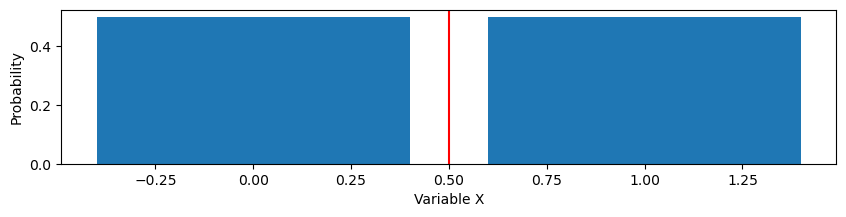

In [63]:
%matplotlib inline

x = np.array([0, 1])
y = np.array([.5, .5])
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, y)
ax.axvline(np.dot(x, y), c='r')
ax.set_xlabel('Variable X')
ax.set_ylabel('Probability')
plt.show()

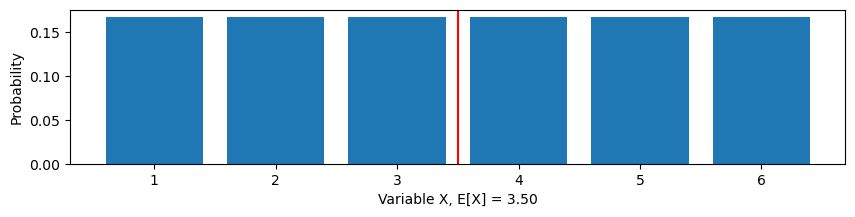

In [64]:
%matplotlib inline

x = np.array(range(1, 7))
y = np.array([1/6] * 6)
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(1, 1, 1)
ax.bar(x, y)
ax.axvline(np.dot(x, y), c='r')
ax.set_xlabel('Variable X, E[X] = %.2f' % np.dot(x, y))
ax.set_ylabel('Probability')
plt.show()

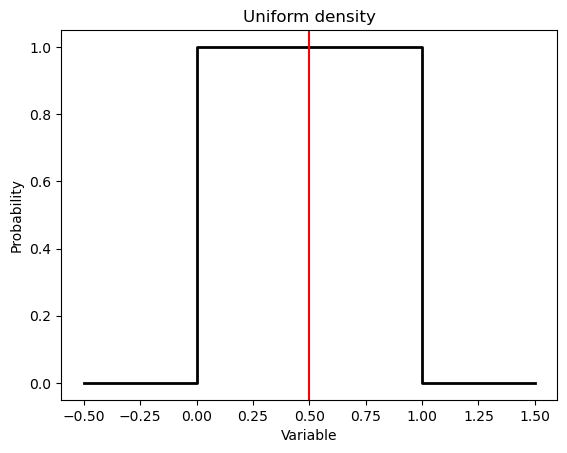

In [65]:
x = np.array([-.5, 0, 0, 1, 1, 1.5])
y = np.array([0, 0, 1, 1, 0, 0])
plt.plot(x, y, 'k', linewidth=2)
plt.xlabel('Variable')
plt.ylabel('Probability')
plt.title('Uniform density')
plt.axvline(.5, c='r')
plt.show()

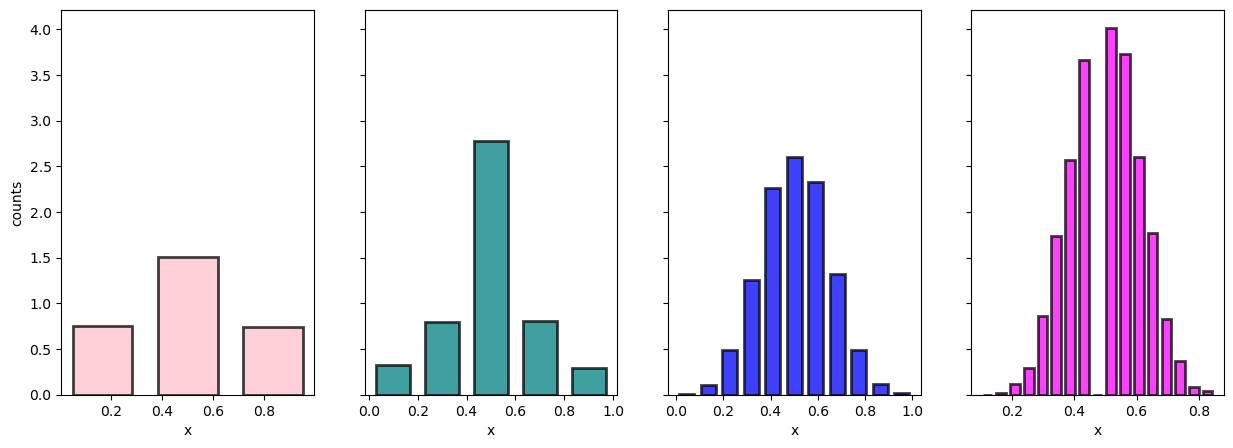

In [66]:
def roll(n):
    # construim o matrice de n x 10000 de valori aleatoare cuprinse intre 0 si 1
    r = np.random.randint(0, high=2, size=(10000, n))
    
    # se face media doar pe axa 1, adica pe linii, rezultatul va fi o matrice
    # de n x 1 in care fiecare element va fi media (aritmetica) a liniei anterioare
    return np.mean(r, axis=1)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 5))
kwargs = dict(rwidth=0.7, density=True, alpha=0.75, ec='k', linewidth=2)
# schimbati scala cu density=True ca sa vedeti cum se reduce imprastierea mediei
# si cum se 'ascute' gaussiana
#
# density=True schimba ordonata din valori count in valori relative, adica probabilitati,
# deci considera ca toata histograma este o Probability Mass Function (si o reprezinta ca atare)
#
ax1.hist(roll(2), 3, **kwargs, facecolor='pink')
[ax_.set_xlabel('x') for ax_ in [ax1, ax2, ax3, ax4]]
ax1.set_ylabel('counts')
ax2.hist(roll(7), 5, **kwargs, facecolor='teal')
ax3.hist(roll(10), 11, **kwargs, facecolor='blue')
ax4.hist(roll(20), 17, **kwargs, facecolor='magenta')
plt.show()

In [67]:
def func(a, b):
    print(f'a: {a} b: {b}')
    
func(1, 2)

a: 1 b: 2


In [68]:
d = { 'b': 5, 'a': 3 }
func(**d)

a: 3 b: 5


In [69]:
l = [4, 6]
func(*l)

a: 4 b: 6


In [70]:
def f(q, r, *l, **kwargs):
    print(l)
    print(kwargs)

In [71]:
f(1, 2, 4, w=3)

(4,)
{'w': 3}


# Variabilitate

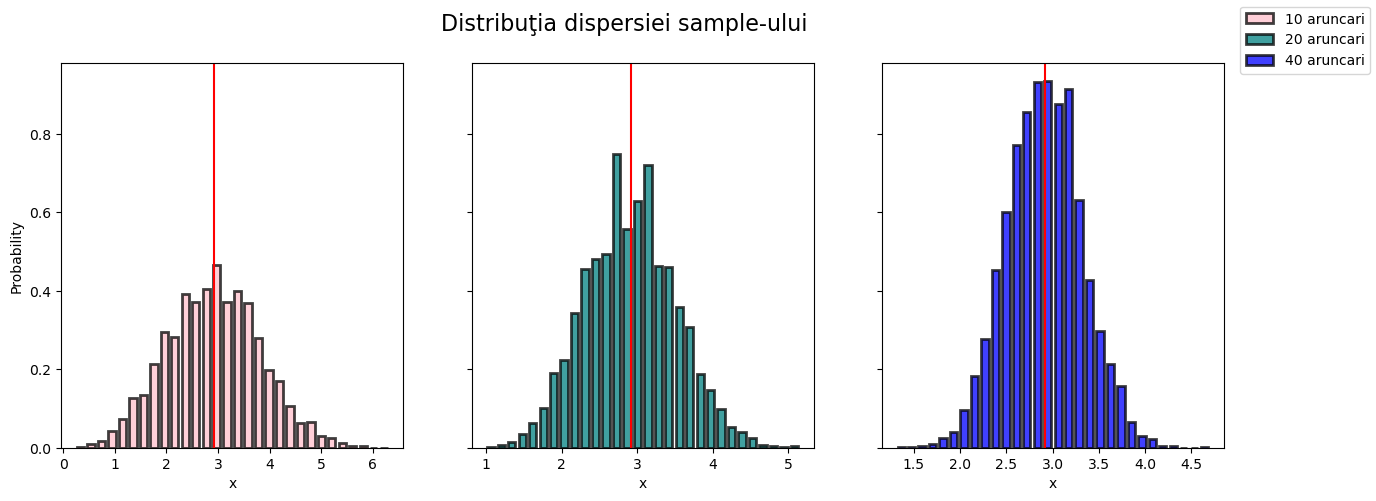

In [72]:
def roll(n):
    r = np.random.randint(1, high=7, size=(10000, n))
    
    # dispersia se calculeaza ca mean(abs(x - x.mean())**2), unde 
    # mean(x) = x.sum() / N, cu N numarul de sample-uri
    return np.var(r, axis=1, ddof=1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
kwargs = dict(rwidth=0.7, density=True, alpha=0.75, ec='k', linewidth=2)
[ax_.set_xlabel('x') for ax_ in [ax1, ax2, ax3]]
ax1.set_ylabel('Probability')

ax1.hist(roll(10), 30, **kwargs, facecolor='pink')
ax2.hist(roll(20), 30, **kwargs, facecolor='teal')
ax3.hist(roll(40), 30, **kwargs, facecolor='blue')

fig.legend(['10 aruncari', '20 aruncari', '40 aruncari'])
[ax_.axvline(2.92, c='r') for ax_ in [ax1, ax2, ax3]]
fig.suptitle('Distribuţia dispersiei sample-ului', fontsize=16)
plt.show()

In [73]:
nosim = 100000
n = 10
x = np.random.randn(nosim, n)
x = np.mean(x, axis=1)
print(np.std(x))
print(1/np.sqrt(n))

0.3164348503941846
0.31622776601683794


In [74]:
nosim = 10000
n = 10
x = np.random.randint(low=0, high=2, size=(nosim, n))
x = np.mean(x, axis=1)
print(np.std(x))
print(0.5/np.sqrt(n))

0.15711335907554136
0.15811388300841897


# Laborator

## Valoare aşteptată (medie)

Valoarea aşteptată a unei variabile aleatoare X, E(X), este o măsură a tendinţei centrale a acesteia. Pentru o variabilă aleatoare X cu probability mass function PMF(X), valoarea aşteptată E(X) este definită ca suma peste toate valorile lui x, din x * p(x). E(x) reprezintă centrul de masă al unor 'bare de metal' poziţionate pe poziţiile x şi 'înalte' de valoarea p(x).

Un alt nume pentru valoarea aşteptată este media. De regulă, prin medie înţelegeam suma a n numere împărţită la n. Această definiţie este consistentă cu valoarea aşteptată E(X) pentru cazul în care toate numerele sunt echiprobabile (aceeaşi înălţime a 'barelor de oţel' de mai sus).

Q1. Considerăm variabila aleatoare X care corespunde unei aruncări cu zarul. Dacă zarul este ideal (corect), toate feţele pot ieşi cu aceeaşi probabilitate. Care este valoarea aşteptată a lui X?

In [75]:
def q():
    return 3.5

print('Raspuns %s' % ('corect' if r(1, q()) else 'incorect'))

Raspuns corect


Q2. Presupunem că avem trei zaruri, primele două trucate, cu centrul de greutate diferit de mijloc, în timp ce al treilea este un zar ideal. Pentru fiecare din cele trei definim probability mass function caracteristică zarului:

In [76]:
pmf1 = [0.04761905, 0.09523810, 0.14285714, 0.19047619, 0.23809524, 0.28571428]
pmf2 = [0.28571429, 0.23809524, 0.19047619, 0.14285714, 0.09523810, 0.04761904]
pmf3 = [0.16666666, 0.16666666, 0.16666667, 0.16666667, 0.16666667, 0.16666667]

Care este valoarea aşteptată pentru primul zar? Daţi răspunsul cu 4 zecimale. Definiţi funcţia expected() de mai jos. Verificaţi că aţi scris corect funcţia folosind valoarea aşteptată pentru un zar corect.

In [77]:
def expected(pmf):
    # Curs 2, slide 11
    return 1*pmf[0]+2*pmf[1]+3*pmf[2]+4*pmf[3]+5*pmf[4]+6*pmf[5]

def q():
    return round(expected(pmf1), 4)

print('Raspuns %s' % ('corect' if r(2, q()) else 'incorect'))

Raspuns corect


Q3. Care este valoarea aşteptată pentru al doilea zar? (tot patru zecimale).

In [78]:
def q():
    return round(expected(pmf2), 4)

print('Raspuns %s' % ('corect' if r(3, q()) else 'incorect'))

Raspuns corect


Pentru două variabile aleatoare X1 şi X2, valoarea aşteptată a mediei lor se poate calcula ca media valorilor lor aşteptate. Aceasta datorită proprietăţii de liniaritate a valorii aşteptate:
$E(\alpha X_1 + \beta X_2) = \alpha E(X_1) + \beta E(X_2)$

Q4. Care este valoarea aşteptată pentru media variabilelor aleatoare reprezentate de primele două zaruri?

__Hint1__: funcţia zip(l1, l2) parcurge două liste prin construcţia de perechi cu elemente din ambele liste. 
Iteraţi de exemplu zip(range(3), range(1, 4)).

__Hint2__: folosiţi funcţia round(x, 4)

In [79]:
def q():
    # cursul 2, slide 38
    # Valoarea asteptata a produsului a doua variabile independente
    return round((expected(pmf1)+expected(pmf2))/2,4)

print('Raspuns %s' % ('corect' if r(4, q()) else 'incorect'))

Raspuns corect


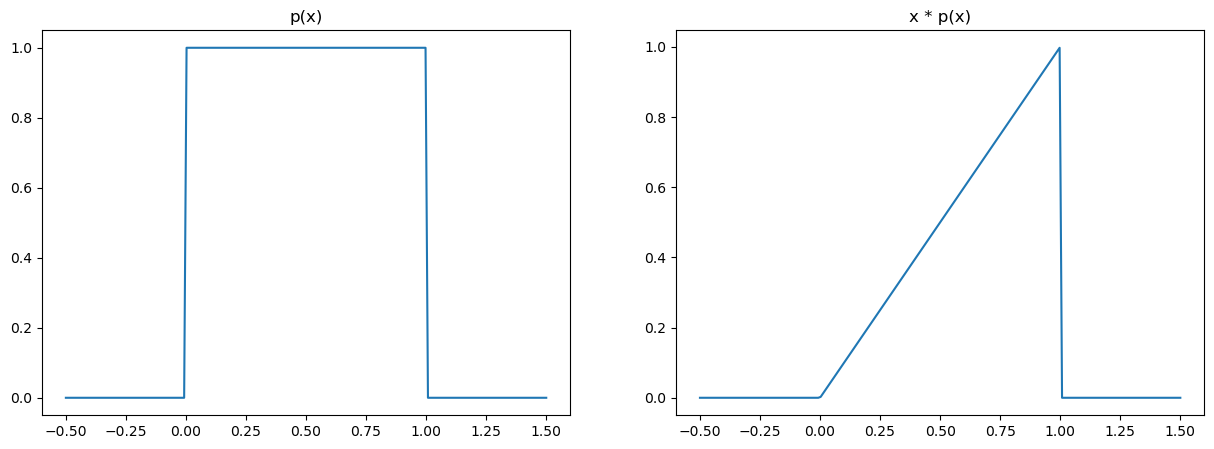

In [80]:
x = np.linspace(-.5, 1.5, 200)
y = np.logical_and(x >= 0, x <= 1)*1.0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(x, y)
ax1.set_title('p(x)')
ax2.plot(x, x*y)
ax2.set_title('x * p(x)')
plt.show()

Q5. Pentru densitatea de probabilitate f(x) dată mai sus, care este valoarea aşteptată pentru E(X)?

In [81]:
def q():
    return 1

print('Raspuns %s' % ('corect' if r(5, q()) else 'incorect'))

Raspuns corect


Q6. Mai jos este dată o populaţie de 6 numere, sub forma unui array Numpy. Funcţia Numpy mean() este folosită pentru a calcula media sa:

In [82]:
population = np.array([1, 4, 7, 10, 13, 19])
print('valoarea aşteptată (media):', np.mean(population))

valoarea aşteptată (media): 9.0


Mai departe, din această populaţie vom selecta, în mod aleator, un sample de trei valori. Vom face acest lucru de 1000 de ori (deci 1000 de sample-uri). Variabila $idx$ de mai jos descrie care din elementele populaţiei a fost selectat aleator - va fi o matrice de 1000 de linii x 3 coloane;

In [83]:
idx = np.random.randint(low=0, high=len(population), size=(1000, 3))

# vedem primele 5 linii ale ei:
print(idx[:5, :])

[[5 0 4]
 [3 1 3]
 [3 1 4]
 [0 0 5]
 [1 5 0]]


Folosind variabila $idx$, prin proiecţie pe populaţie, vom obţine cele 1000 de sample-uri (matricea rezultată are aceleaşi dimensiuni):

In [84]:
samples = population[idx]
print('forma matricii: %s (linii, coloane)' % str(samples.shape))

forma matricii: (1000, 3) (linii, coloane)


Pentru fiecare linie, calculăm media (observaţi argumentul axis; acesta indică axa pentru care se face funcţia, aici 1 înseamnă că se face pe linii; pe coloane ar fi fost axis=0):

In [85]:
means = np.mean(samples, axis=1)

# iată primele 5 medii:
means[:5]

array([11.,  8.,  9.,  7.,  8.])

Sample mean pe care o tot socotim de 1000 de ori are şi ea o distribuţie. Media acestei distribuţii este un estimator pentru media populaţiei:

In [86]:
np.mean(means)

8.942

Pentru dimensiuni ale sample-ului de 2, 3, 4, ridicaţi distribuţia sample mean, folosind atât codul de mai sus cât şi cel prezentat la curs pentru aruncarea zarului - funcţia roll() şi graficul aferent.

Q7. Valoarea aşteptată este o proprietate a:

1. statisticii
2. variabilităţii
3. distribuţiei
4. matematicii

In [87]:
def q():
    # Curs 2, slide 15
    # Expected value este centrul distributiei 
    return 3

print('Raspuns %s' % ('corect' if r(7, q()) else 'incorect'))

Raspuns corect


Q8. Media populaţiei este centrul de masă al:

1. distribuţiei
2. populaţiei
3. sample-ului
4. familiei

In [88]:
def q():
    # raspuns contrariu cu slide-ul 15 din cursul 2(?)
    # As the name suggests
    return 2

print('Raspuns %s' % ('corect' if r(8, q()) else 'incorect'))

Raspuns corect


Q9. Sample mean este centrul de masă al:

1. datelor observate
2. familiei
3. populaţiei
4. distribuţiei

In [89]:
def q():
    # Curs 2, slide 15
    return 1

print('Raspuns %s' % ('corect' if r(9, q()) else 'incorect'))

Raspuns corect


Q10. Media populaţiei estimează sample mean? (da/nu) 
Este sample mean unbiased? (da/nu) 
Pe măsură ce adăugăm mai multe experimente sample-ului, devine densitatea de probabilitate din ce în ce mai concentrată în jurul mediei populaţiei? (da/nu)

Daţi un răspuns de genul 'x/x/x', unde x este 'da' sau 'nu'.

In [90]:
def q():
    # 2. Curs 2, slide 15 => Este unbiased. Distributia sample means este
    # chiar media populatiei pe care incearca sa o estimeze 
    # 3. Curs 2, slide 15 => Cu cat avem un sample mai mare pentru
    #  care calculam media, cu atat mai concentrata este distributia
    return 'nu/da/da'

print('Raspuns %s' % ('corect' if r(10, q()) else 'incorect'))

Raspuns corect


## Variabilitate

Variance (dispersia) pentru o variabilă aleatoare măsoară împrăştierea acesteia faţă de medie. Ea, ca şi media, este determinată ca valoarea aşteptată a pătratului diferenţei faţă de medie:
\begin{equation}
Var(X) = E( (X - \mu)^2 ) = E( (X - E(X))^2 ) = E(X^2) - E(X)^2
\end{equation}

Vom considera proprietatea de liniaritate a dispersiei, $Var(aX) = a^2 Var(X)$:

\begin{equation}
\begin{split}
Var(aX) &= E((aX)^2) - E(aX)^2 \\
&= E(a^2X^2) - (aE(X))^2 \\
&= a^2E(X^2) - a^2E(X)^2 \\
&= a^2Var(X)
\end{split}
\end{equation}


Q11. Fie o populaţie a aruncărilor cu zarul. Probabilitatea fiecărei feţe este $1/6$. Care este valoarea aşteptată a feţei care va ieşi (media)? Încercaţi să nu introduceţi valoarea direct ci să scrieţi cod numpy care o calculează.

In [91]:
x = np.array(range(1, 7))
print('Evenimente posibile:', x)

def q():
    return np.divide((1+2+3+4+5+6),6)

print('Raspuns %s' % ('corect' if r(11, q()) else 'incorect'))

Evenimente posibile: [1 2 3 4 5 6]
Raspuns corect


Q12. Mai departe, care este valoarea aşteptată a pătratului variabilei aleatoare x de mai sus?

In [92]:
x = np.array(range(1, 7))
print('Evenimente posibile:', x)

def q():
    # Curs 2, slide 19
    s=0
    for i in x:
        s = s + np.power(i,2)
    return s/6

print('Raspuns %s' % ('corect' if r(12, np.round(q(), 3)) else 'incorect'))

Evenimente posibile: [1 2 3 4 5 6]
Raspuns corect


Q13. În continuare, care este valoarea dispersiei? Calculaţi-o ca diferenţa dintre valoarea aşteptată a pătratelor variabilei aleatoare X şi pătratul mediei sale:

In [93]:
x = np.array(range(1, 7))
print('Evenimente posibile:', x)

def q():
    s=0
    for i in x:
        s = s + np.power(i,2)
    ex = np.divide((1+2+3+4+5+6),6)
    ex2=s/6
    return ex2-np.power(ex,2)

print('Raspuns %s' % ('corect' if r(13, np.round(q(), 3)) else 'incorect'))

Evenimente posibile: [1 2 3 4 5 6]
Raspuns corect


Q14. Considerăm dispersia mediei sample-urilor pentru o variabilă aleatoare, adică $Var(\bar{X})$. Presupunem $n$ variabile independente $X_i$. Care din următoarele este expresia lui $Var(\bar{X})$?

1. $Var(1/n * \sum_i X_i)$
2. $E(1/n * \sum_i X_i)$
3. $\sigma$
4. $\mu$

In [94]:
def q():
    # Curs 2, slide 31
    return 1

print('Raspuns %s' % ('corect' if r(14, q()) else 'incorect'))

Raspuns corect


Q15. Cu care din următoarele este egală $Var(1/n * \sum_i X_i)$ ? Folosiţi proprietatea de liniaritate a dispersiei.

1. $1/n^2 * E(\sum_i X_i)$
2. $\mu / n^2$
3. $1/n^2 * Var(\sum_i X_i)$
4. $\sigma / n$

In [95]:
def q():
    # Curs 2, slide 31
    return 3

print('Raspuns %s' % ('corect' if r(15, q()) else 'incorect'))

Raspuns corect


Q16. Mai departe, cu ce este egală $Var(\sum_i X_i)$? Atenţie, variabilele aleatoare $X_i$ sunt independente.

1. $\sum_i Var(X_i)$
2. $E(\sum_i X_i)$
3. $Var(\sigma)$
4. $E(\mu)$

In [96]:
def q():
    # Curs 2, slide 31
    return 1

print('Raspuns %s' % ('corect' if r(16, q()) else 'incorect'))

Raspuns corect


Q17. Mai departe, fiecare $X_i$ provine dintr-o populaţie cu dispersie $\sigma^2$. Cu ce este egală $\sum_i Var(X_i)$ ?

1. $n^2 * Var(\sigma)$
2. $n * E(\mu)$
3. $n * \mu$
4. $n * \sigma^2$

In [97]:
def q():
    # Curs 2, slide 31
    return 4

print('Raspuns %s' % ('corect' if r(17, q()) else 'incorect'))

Raspuns corect


Q18. În cele ce urmează ne propunem să verificăm modul de calcul teoretic al standard error. Ne reamintim cum funcţionează aceasta pentru evenimentele reprezentînd aruncarea monezii:

In [98]:
# Pentru o moneda cu probabilitatea p sa iasa Head, avem:
# * media este p
# * dispersia (variance) este p*(1-p), sau p*p daca moneda este ideala
#   in acest ultim caz, deviatia standard este tot p

# generam o matrice de 10000 x 10 de aruncari fair, valori intre 0 si 1
nosim, n = 10000, 10
x = np.random.randint(low=0, high=2, size=(nosim, n))

# fiecare sample consta din 10 aruncari; calculam media acestor 10 aruncari
x = np.mean(x, axis=1)

# calculam deviaţia standard a mediei (radical din standard error) teoretic
print('std teoretica: ', 0.5/np.sqrt(n))

# calculam deviaţia standard folosind numpy
print('std numpy:     ', np.std(x))

# calculati deviatia standard de mana, pornind de la sample-ul x, scriind explicit formula:
def stddev(x):
    return np.sqrt(np.sum((x - np.mean(x))**2) / nosim)

print('Raspuns %s' % ('corect' if stddev(x) == np.std(x) else 'incorect'))
print('std calculata: ', stddev(x))

std teoretica:  0.15811388300841897
std numpy:      0.15752110176100217
Raspuns corect
std calculata:  0.15752110176100217


Q19. Realizaţi acelaşi calcul, de data aceasta pentru evenimentele aruncării cu zarul:

__Notă__: cam 1/10 din cazuri o să primiţi 'răspuns incorect', chiar dacă rezolvarea e bună

In [99]:
x = np.array([1, 2, 3, 4, 5, 6])
mu = np.mean(x)
sigma = np.var(x)
print(mu, sigma)

nosim, n = 10000, 10
x = np.random.randint(low=0, high=2, size=(nosim, n))
x = np.mean(x, axis=1)

# calculati standard error of the mean
def stderror(sigma, n):
    return sigma/np.sqrt(n)

print(np.std(x))
print(stderror(sigma, n))

print('Raspuns %s' % ('corect' if (np.round(stderror(x, n), 2) == np.round(np.std(x)).any(), 2) else 'incorect'))

3.5 2.9166666666666665
0.1587238091780814
0.9223309842157772
Raspuns corect


Q20. a) Pentru o distribuţie normală de medie 10 şi dispersie 2, consideraţi un număr variabil de sample size-uri pe care le extrageţi din distribuţie: 10, 20, 40, 60 de sample-uri. Calculaţi media pe sample. Repetaţie de 
10000 de ori. Ridicaţi histogramele distribuţiei mediei sample-ului (sample mean).

b) Realizaţi acelaşi lucru şi pentru distribuţia dispersiei (variance).

Observaţi valorile unde se centrează distribuţiile obţinute.

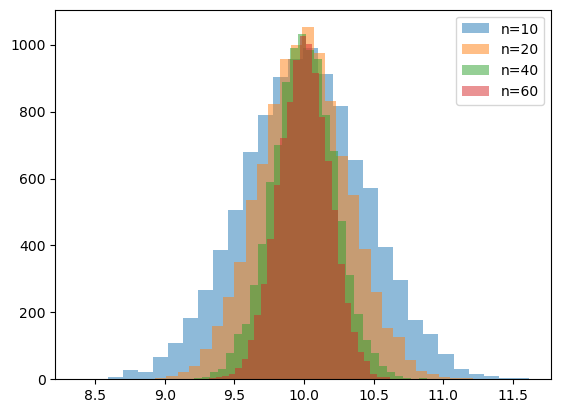

In [100]:
mean = 10
dispersie = 2
sample_sizes = [10, 20, 40, 60]

for n in sample_sizes:
    sample_means = []
    for i in range(10000):
        # generam sample-uri din distributie
        sample = np.random.normal(mean, np.sqrt(dispersie), n)
        # calculam media
        sample_mean = np.mean(sample)
        # o adaugam la lista 
        sample_means.append(sample_mean)
    
    plt.hist(sample_means, bins=30, alpha=0.5, label=f'n={n}')
# pe masura ce sample-lul creste distributiile mediei devin mai inguste
# se centreaza valorile in jurul valorii 10 (media)
plt.legend()
plt.show()